                                    IMPORTING REQUIRED LIBRARIES AND MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support,recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")
import sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import imblearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from numpy import where
from time import time
%matplotlib inline

In [2]:
#!python3 -m pip install seaborn

Creating Instances

In [3]:
label_encoder=LabelEncoder()
scaler_min=MinMaxScaler()
scaler_std=StandardScaler()

                                    
                                READING DATASETS INTO DATAFRAME

In [4]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [5]:
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [6]:
df_train = pd.read_csv(train_url,header=None, names = columns)

df_test = pd.read_csv(test_url, header=None, names = columns)

In [7]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


                                        Extrapolatry Data Analysis(EDA)

In [9]:
print("Number of instances in train dataset:", df_train.shape[0])
print("Number of instances in test dataset:", df_test.shape[0])

Number of instances in train dataset: 125973
Number of instances in test dataset: 22544


In [10]:
#df_train.describe().transpose()


In [11]:
#df_test.describe().transpose()

In [12]:
#df_test.info()
# NO NULL ENTRIES ARE AVAILABLE

No Null Values Confirmed with below two cells and heatmap shown below

Exploring unique values in each attribute

In [13]:
#df_train.nunique()

In [14]:
#df_test.nunique()

# remove useless feature

In [15]:
# this is deleted because it had only zero value filled in the whole dataset
df_train.drop(columns="num_outbound_cmds", inplace=True)
df_test.drop(columns="num_outbound_cmds", inplace=True)

Checking Datatype of each attribute

Analysis based on Correlation 

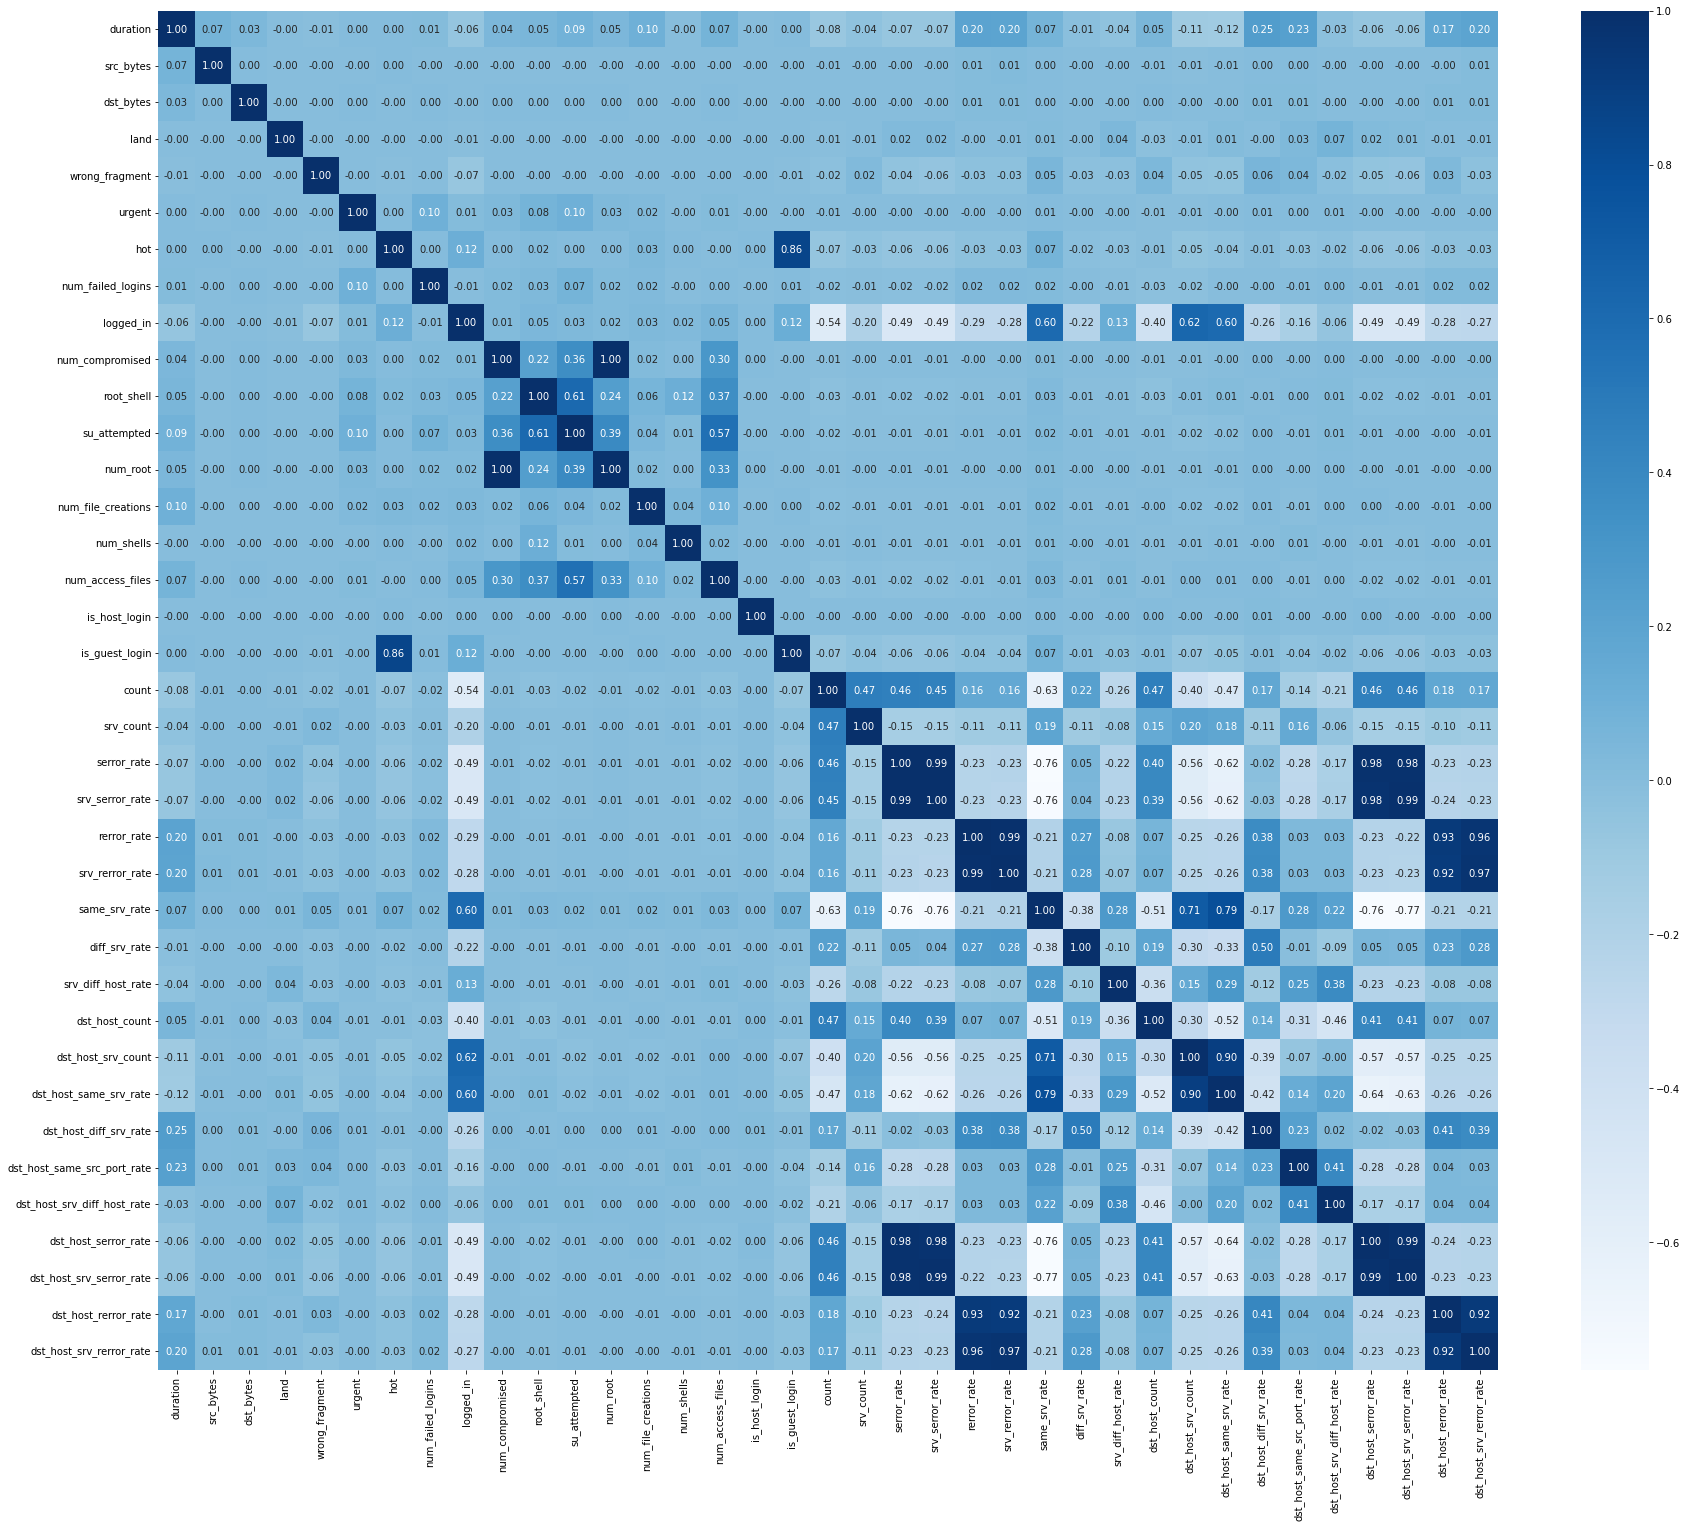

In [16]:
plt.subplots(figsize=(30, 25))
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, fmt='0.2f')
plt.savefig("Correlation heatmap",dpi=500)

Attacks Analysis

In [17]:
# Number of attacks in the Dataset
df_train[df_train["label"] != 'normal']['label'].nunique()

22

In [18]:
df_train[df_train["label"] != 'normal']['label'].value_counts()
# from it is clear that neptune attack is most common and spy attack is the least attackers prefer

neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

# Remove data with too less data

Attacks like spy,perl,phf,mutlihop,ftp_write,loadmodule, have instances less than 10 so we will drop these since there will not be sufficient training data.
We can also take this threshold till 20 but here till 10 it considered only.

In [19]:
df_train['label'] = df_train['label'].replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_train = df_train.dropna()

In [20]:
df_test['label'] = df_test['label'].replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_test = df_test.dropna()

Object datatype

In [21]:
df_train['service']= label_encoder.fit_transform(df_train['service'])
df_test['service']=label_encoder.fit_transform(df_test['service'])
df_train['service'].value_counts()

24    40334
49    21853
12     9043
54     7313
20     6850
      ...  
61        3
27        2
3         2
22        2
25        1
Name: service, Length: 70, dtype: int64

In [22]:
df_train['protocol_type'].replace({'tcp':1,'udp':2,'icmp':3},inplace=True)
df_test['protocol_type'].replace({ 'tcp':1,'udp':2,'icmp':3},inplace=True)
df_train['protocol_type'].value_counts()


1    102656
2     14993
3      8291
Name: protocol_type, dtype: int64

In [23]:
df_train['flag'].replace({'SF':11,'S0':10,'REJ':9,'RSTR':8,'RSTO':7,'S1':6,'SH':5,'S2':4,'RSTOS0':3,'S3':2,'OTH':1},inplace=True)
df_test['flag'].replace({'SF':11,'S0':10,'REJ':9,'RSTR':8,'RSTO':7,'S1':6,'SH':5,'S2':4,'RSTOS0':3,'S3':2,'OTH':1},inplace=True)
df_train['flag'].value_counts()


11    74912
10    34851
9     11233
8      2421
7      1562
6       365
5       271
4       127
3       103
2        49
1        46
Name: flag, dtype: int64

In [24]:
test_attack=df_test['label'].unique().tolist()
train_attack=df_train['label'].unique().tolist()
print(len(test_attack))
print(len(train_attack))
l1=list(set(test_attack)-set(train_attack))
print(l1)
# df_test['label'] = df_test['label'].replace(
#     l1, np.nan)
# df_test = df_test.dropna()
# df_test['label'].nunique()


33
17
['xlock', 'snmpgetattack', 'sendmail', 'xterm', 'mailbomb', 'worm', 'apache2', 'sqlattack', 'xsnoop', 'mscan', 'saint', 'udpstorm', 'snmpguess', 'named', 'httptunnel', 'processtable', 'ps']


In [25]:
df_required=df_test[(df_test['label']=='sendmail') | (df_test['label']=='mailbomb') | (df_test['label']=='worm') | (df_test['label']=='xsnoop') | (df_test['label']=='processtable') |
(df_test['label']=='httptunnel') | (df_test['label']=='sqlattack') | (df_test['label']=='mscan') | (df_test['label']=='udpstorm') | (df_test['label']=='xlock') |
(df_test['label']=='apache2') | (df_test['label']=='saint') | (df_test['label']=='snmpgetattack') | (df_test['label']=='xterm') |(df_test['label']=='named') | (df_test['label']=='ps') | (df_test['label']=='snmpguess')]

In [26]:
df_train=pd.concat([df_train,df_required],axis=0)


In [27]:
df_train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)
df_test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)



In [28]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=df_train[~df_train['label'].isin(to_drop_DoS)];
Probe_df=df_train[~df_train['label'].isin(to_drop_Probe)];
R2L_df=df_train[~df_train['label'].isin(to_drop_R2L)];
U2R_df=df_train[~df_train['label'].isin(to_drop_U2R)];

#test
DoS_df_test=df_test[~df_test['label'].isin(to_drop_DoS)];
Probe_df_test=df_test[~df_test['label'].isin(to_drop_Probe)];
R2L_df_test=df_test[~df_test['label'].isin(to_drop_R2L)];
U2R_df_test=df_test[~df_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (114989, 41)
Dimensions of Probe: (80314, 41)
Dimensions of R2L: (69003, 41)
Dimensions of U2R: (67413, 41)
Test:
Dimensions of DoS: (17171, 41)
Dimensions of Probe: (12132, 41)
Dimensions of R2L: (12573, 41)
Dimensions of U2R: (9774, 41)


In [29]:
map_to_class={0:'normal',1:'DoS',2:"Probe",3:'R2L',4:"U2R"}

FROM BELOW GRAPH IT IS CLEAR THAT ATTACKS BELONGING TO R2L AND U2R HAVE VERY LOW NUMBER OF INSTANCES<br> WHICH NEEDS TO BE HANDLED TO MAKE A  GOOD MODEL

In [30]:
df_train_label_dos=DoS_df['label']
df_test_label_dos=DoS_df_test['label']
df_train_label_probe=Probe_df['label']
df_test_label_probe=Probe_df_test['label']
df_train_label_R2L=R2L_df['label']
df_test_label_R2L=R2L_df_test['label']
df_train_label_U2R=U2R_df['label']
df_test_label_U2R=U2R_df_test['label']

STANDARDIZING DATASET BEFORE FEATURE SELECTION

In [31]:
columns_before_normal = ["duration", 'service',"protocol_type", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]

USING MINMAX SCALER FOR STANDARDIZING

In [32]:
def prepData(train, test, train_label, test_label):
    df_train_int=train[columns_before_normal]
    df_test_int=test[columns_before_normal]

    scaler_min.fit(df_train_int)
    x_train = scaler_min.transform(df_train_int)
    scaler_min.fit(df_test_int)
    x_test = scaler_min.transform(df_test_int)

    df_train_minmax_without_label=pd.DataFrame(x_train,columns=columns_before_normal)
    df_test_minmax_without_label=pd.DataFrame(x_test,columns=columns_before_normal)
    df_train_minmax_without_label.shape

    cols=df_train_minmax_without_label.columns.tolist()
    train_x=df_train_minmax_without_label[cols]
    train_y=train_label

    df_train_data=train.values
    X_before, y_before = df_train_data[:, :-1], df_train_data[:, -1]
    counter = Counter(y_before)

    label_list=train_y.tolist()
    train_x['label']=label_list

    #this  usually takes 3-4 minutes
    data = train_x.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable
    # y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    df_train_X=pd.DataFrame(X,columns=cols)
    df_train_X

    label="label"
    df_train_Y=pd.DataFrame(y)

    df_train_Y.rename(columns={0:"label"},inplace=True)

    train_x=df_train_X
    train_y=df_train_Y

    features = SelectKBest(score_func=chi2, k=x_train.shape[1])

    #fit features to the training dataset
    fit = features.fit(train_x, train_y)

    # sort the features by importance score
    plt.figure(figsize=(10,10))
    feature_importances = zip(df_train_X.columns, features.scores_)
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    sorted_importances = [importance[1] for importance in feature_importances]
    sorted_features = [importance[0] for importance in feature_importances]

    x_values = list(range(len(feature_importances)))

    # plot the cumulative scores
    cumulative_importances = np.cumsum(sorted_importances)
    plt.plot(x_values, cumulative_importances,color='#A2EC0D')

    # Draw line at 99% of importance retained 
    value99 = cumulative_importances[-1]*0.99

    plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
    plt.xticks(x_values, sorted_features, rotation = 'vertical',)
    plt.yticks([], [])
    plt.xlabel('Feature Variable', fontsize=8)
    plt.title('A Chart to Show Cumulative Feature Scores')
    #plt.figure(figsize=(500,200))
    plt.tight_layout()
    plt.savefig('cum_features', dpi=500)

    # perform selectkbest with k=40
    features = SelectKBest(score_func=chi2, k=25)
    fit = features.fit(train_x,train_y)
    train_x = fit.transform(train_x)

    new_features = df_train_X.columns[features.get_support(indices=True)]

    df_train_model=df_train_X[new_features]
    df_test_model=df_test_minmax_without_label[new_features]

    X_train=df_train_model
    Y_train=df_train_Y['label']
    X_test=df_test_model
    Y_test=test_label
    return X_test, Y_test, X_train, Y_train


CONVERTING THE DATA BACK INTO DATAFRAME FORM

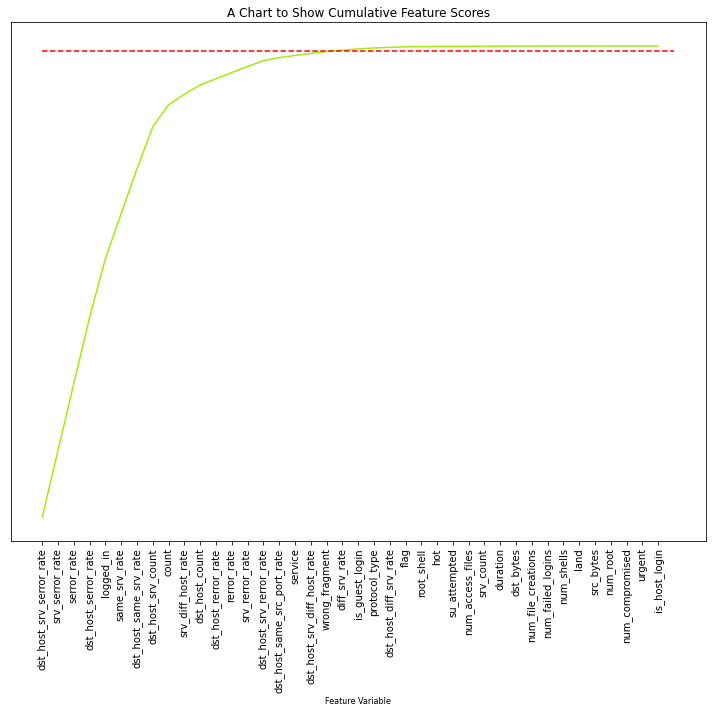

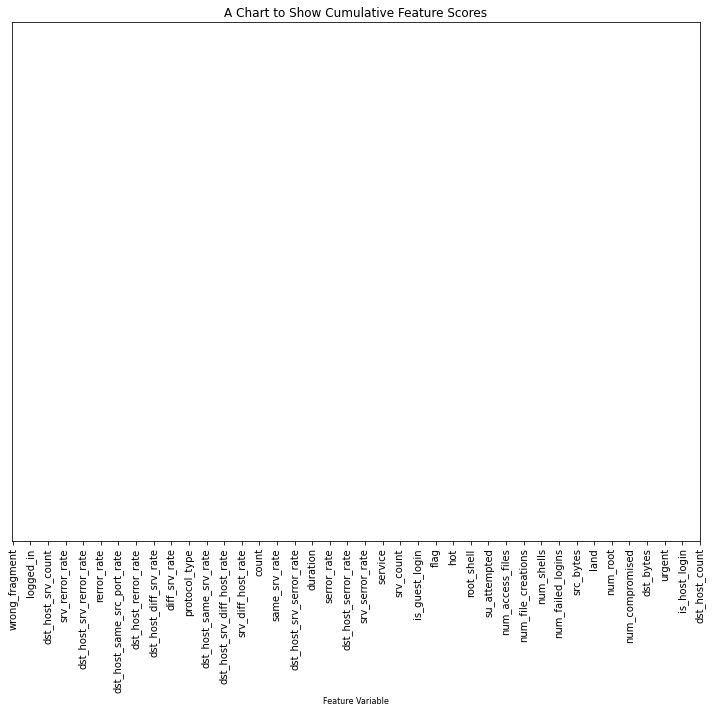

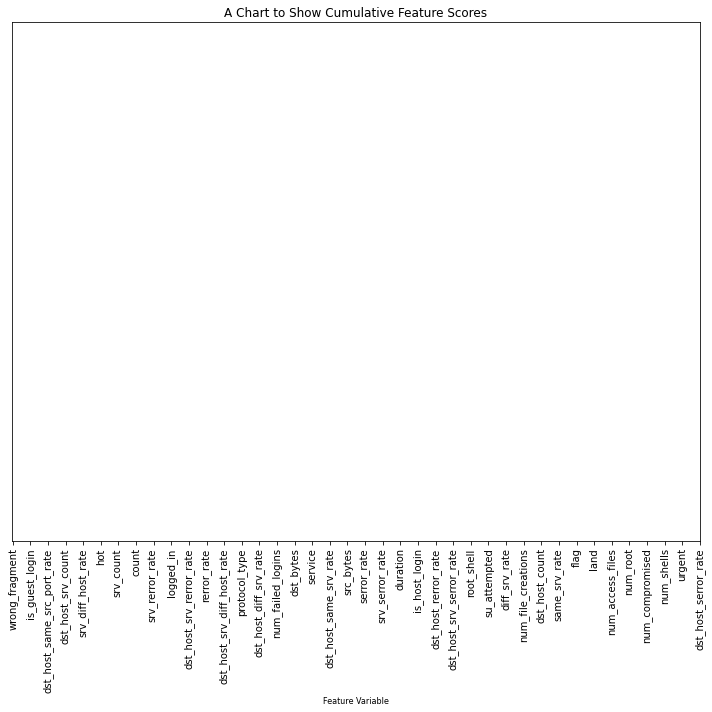

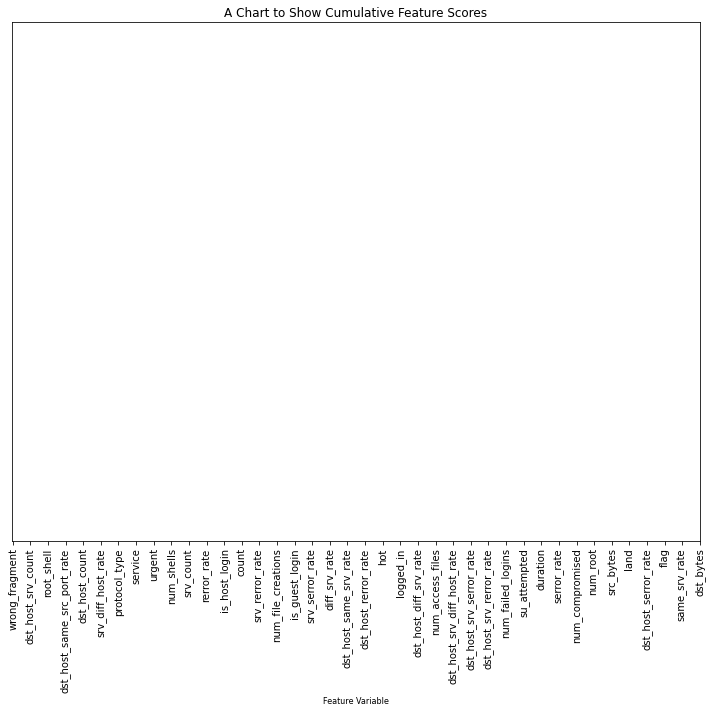

In [35]:
X_test_dos, Y_test_dos, X_train_dos, Y_train_dos = prepData(DoS_df, DoS_df_test, df_train_label_dos, df_test_label_dos)
X_test_probe, Y_test_probe, X_train_probe, Y_train_probe = prepData(Probe_df, Probe_df_test, df_train_label_probe, df_test_label_probe)
X_test_R2L, Y_test_R2L, X_train_R2L, Y_train_R2L = prepData(R2L_df, R2L_df_test, df_train_label_R2L, df_test_label_R2L)
X_test_U2R, Y_test_U2R, X_train_U2R, Y_train_U2R = prepData(U2R_df, U2R_df_test, df_train_label_U2R, df_test_label_U2R)


                                     Feature Selection

# Above Chart Shows that 99% of the feature score is from first 25 columns and rest of the columns doesn't contribute much so taking only those 25 features for further modelling

to_check have rest 15 attributes which should not be part of the resulting dataframe

                                     TRAINING AND TESTING OF MACHINE LEARNING ALGORITHMS 

# DECISION TREE

In [36]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = DecisionTreeClassifier(random_state=0)
clf4 = DecisionTreeClassifier(random_state=0)
t0 = time()
clf1.fit(X_train_dos, Y_train_dos)
clf2.fit(X_train_probe, Y_train_probe)
clf3.fit(X_train_R2L, Y_train_R2L)
clf4.fit(X_train_U2R, Y_train_U2R)
tt1 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt1, 3)))

Classifier trained in 0.096 seconds.


In [37]:

t0 = time()
predDT1 = clf1.predict(X_test_dos)
predDT2 = clf2.predict(X_test_probe)
predDT3 = clf3.predict(X_test_R2L)
predDT4 = clf4.predict(X_test_U2R)
tt12 = time() - t0
print("Predicted in {} seconds".format(round(tt12, 3)))

Predicted in 0.011 seconds


In [39]:
accDT1 = accuracy_score(Y_test_dos, predDT1)
accDT2 = accuracy_score(Y_test_probe, predDT2)
accDT3 = accuracy_score(Y_test_R2L, predDT3)
accDT4 = accuracy_score(Y_test_U2R, predDT4)
print("Accuracy is {}.".format(round(accDT1, 4)))
print("Accuracy is {}.".format(round(accDT2, 4)))
print("Accuracy is {}.".format(round(accDT3, 4)))
print("Accuracy is {}.".format(round(accDT4, 4)))



Accuracy is 0.9998.
Accuracy is 0.9999.
Accuracy is 0.9957.
Accuracy is 1.0.


# RANDOM FOREST

In [40]:
# this usually takes 1-2 minutes
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf3 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
clf4 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
t0 = time()
clf1.fit(X_train_dos, Y_train_dos)
clf2.fit(X_train_probe, Y_train_probe)
clf3.fit(X_train_R2L, Y_train_R2L)
clf4.fit(X_train_U2R, Y_train_U2R)
tt2 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt2, 3)))

Classifier trained in 2.039 seconds.


In [42]:
t0 = time()
predRF1 = clf1.predict(X_test_dos)
predRF2 = clf2.predict(X_test_probe)
predRF3 = clf3.predict(X_test_R2L)
predRF4 = clf4.predict(X_test_U2R)

tt22 = time() - t0
print("Predicted in {} seconds".format(round(tt22, 3)))
print(predRF1)

Predicted in 0.301 seconds
[1 1 0 ... 0 1 0]


In [43]:
accRF1 = accuracy_score(Y_test_dos, predRF1)
accRF2 = accuracy_score(Y_test_probe, predRF2)
accRF3 = accuracy_score(Y_test_R2L, predRF3)
accRF4 = accuracy_score(Y_test_U2R, predRF4)
print("Accuracy is {}.".format(round(accRF1, 4)))
print("Accuracy is {}.".format(round(accRF2, 4)))
print("Accuracy is {}.".format(round(accRF3, 4)))
print("Accuracy is {}.".format(round(accRF4, 4)))




Accuracy is 0.9998.
Accuracy is 0.9999.
Accuracy is 0.9957.
Accuracy is 1.0.


# NAIVE-BAYES

In [44]:
from sklearn.naive_bayes import BernoulliNB
clf1 = BernoulliNB()
clf2 = BernoulliNB()
clf3 = BernoulliNB()
clf4 = BernoulliNB()
t0 = time()
clf1.fit(X_train_dos, Y_train_dos)
clf2.fit(X_train_probe, Y_train_probe)
clf3.fit(X_train_R2L, Y_train_R2L)
clf4.fit(X_train_U2R, Y_train_U2R)
tt3 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt3, 3)))

Classifier trained in 0.03 seconds.


In [45]:
t0 = time()
predNB1 = clf1.predict(X_test_dos)
predNB2 = clf2.predict(X_test_probe)
predNB3 = clf3.predict(X_test_R2L)
predNB4 = clf4.predict(X_test_U2R)
tt32 = time() - t0
print("Predicted in {} seconds".format(round(tt32, 3)))
print(predNB1)

Predicted in 0.023 seconds
[1 1 0 ... 0 0 0]


In [46]:
accNB1 = accuracy_score(Y_test_dos, predNB1)
accNB2 = accuracy_score(Y_test_probe, predNB2)
accNB3 = accuracy_score(Y_test_R2L, predNB3)
accNB4 = accuracy_score(Y_test_U2R, predNB4)
print("Accuracy is {}.".format(round(accNB1, 4)))
print("Accuracy is {}.".format(round(accNB2, 4)))
print("Accuracy is {}.".format(round(accNB3, 4)))
print("Accuracy is {}.".format(round(accNB4, 4)))



Accuracy is 0.9147.
Accuracy is 0.9566.
Accuracy is 0.8711.
Accuracy is 0.9918.


In [47]:
#this usually takes around 30 seconds
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()
clf4 = LogisticRegression()
t0 = time()
clf1.fit(X_train_dos, Y_train_dos)
clf2.fit(X_train_probe, Y_train_probe)
clf3.fit(X_train_R2L, Y_train_R2L)
clf4.fit(X_train_U2R, Y_train_U2R)
tt4 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt4, 3)))

Classifier trained in 0.244 seconds.


In [48]:
t0 = time()
predLR1 = clf1.predict(X_test_dos)
predLR2 = clf2.predict(X_test_probe)
predLR3 = clf3.predict(X_test_R2L)
predLR4 = clf4.predict(X_test_U2R)
tt42 = time() - t0
print("Predicted in {} seconds".format(round(tt42, 3)))

Predicted in 0.007 seconds


In [49]:
accLR1 = accuracy_score(Y_test_dos, predLR1)
accLR2 = accuracy_score(Y_test_probe, predLR2)
accLR3 = accuracy_score(Y_test_R2L, predLR3)
accLR4 = accuracy_score(Y_test_U2R, predLR4)
print("Accuracy is {}.".format(round(accLR1, 4)))
print("Accuracy is {}.".format(round(accLR2, 4)))
print("Accuracy is {}.".format(round(accLR3, 4)))
print("Accuracy is {}.".format(round(accLR4, 4)))



Accuracy is 0.9539.
Accuracy is 0.9823.
Accuracy is 0.917.
Accuracy is 0.9952.


# SUPPORT VECTOR MACHINE

In [50]:
#this usually takes 75 seconds
from sklearn.svm import LinearSVC
clf1= LinearSVC(random_state=0)
clf2= LinearSVC(random_state=0)
clf3= LinearSVC(random_state=0)
clf4= LinearSVC(random_state=0)
t0 = time()
clf1.fit(X_train_dos, Y_train_dos)
clf2.fit(X_train_probe, Y_train_probe)
clf3.fit(X_train_R2L, Y_train_R2L)
clf4.fit(X_train_U2R, Y_train_U2R)
tt5 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt5, 3)))

Classifier trained in 0.232 seconds.


In [51]:
t0 = time()
predSVM1 = clf1.predict(X_test_dos)
predSVM2 = clf2.predict(X_test_probe)
predSVM3 = clf3.predict(X_test_R2L)
predSVM4 = clf4.predict(X_test_U2R)
tt52 = time() - t0
print("Predicted in {} seconds".format(round(tt52, 3)))


Predicted in 0.007 seconds


In [52]:
accSVM1 = accuracy_score(Y_test_dos, predSVM1)
accSVM2 = accuracy_score(Y_test_probe, predSVM2)
accSVM3 = accuracy_score(Y_test_R2L, predSVM3)
accSVM4 = accuracy_score(Y_test_U2R, predSVM4)
print("Accuracy is {}.".format(round(accSVM1, 4)))
print("Accuracy is {}.".format(round(accSVM2, 4)))
print("Accuracy is {}.".format(round(accSVM3, 4)))
print("Accuracy is {}.".format(round(accSVM4, 4)))

Accuracy is 0.9524.
Accuracy is 0.9815.
Accuracy is 0.9311.
Accuracy is 0.9956.


                                             EVALUATION AND ANALYSIS

COMPARING ON THE BASIS OF ACCURACY SCORE

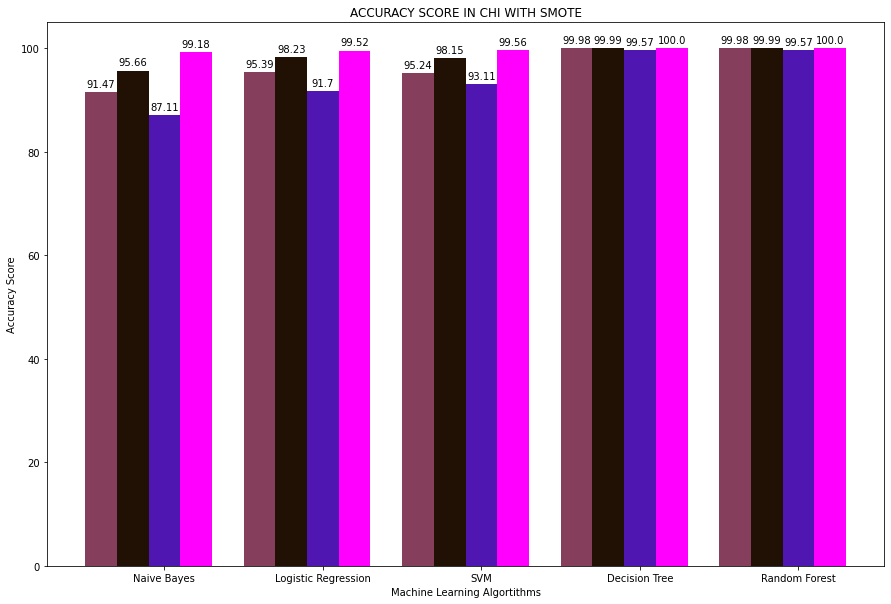

In [62]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.4, y[i]+1, round(y[i],2), ha = 'center')
def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i-0.2, y[i]+1, round(y[i],2), ha = 'center')
def addlabels3(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, round(y[i],2), ha = 'center')
def addlabels4(x,y):
    for i in range(len(x)):
        plt.text(i+0.2, y[i]+1, round(y[i],2), ha = 'center')

names=['Naive Bayes','Logistic Regression','SVM','Decision Tree','Random Forest']
AccuracyScore1=[accNB1*100,accLR1*100,accSVM1*100,accDT1*100,accRF1*100]
AccuracyScore2=[accNB2*100,accLR2*100,accSVM2*100,accDT2*100,accRF2*100]
AccuracyScore3=[accNB3*100,accLR3*100,accSVM3*100,accDT3*100,accRF3*100]
AccuracyScore4=[accNB4*100,accLR4*100,accSVM4*100,accDT4*100,accRF4*100]
plt.figure(figsize=(15,10))
X_axis = np.arange(len(names))
plt.bar(X_axis-0.4,AccuracyScore1,0.2,color='#853F5C')
plt.bar(X_axis-0.2,AccuracyScore2,0.2,color='#211105')
plt.bar(X_axis+0.2,AccuracyScore4,0.2,color='magenta')
plt.bar(X_axis,AccuracyScore3,0.2,color='#5016B1')
addlabels(names, AccuracyScore1)
addlabels2(names, AccuracyScore2)
addlabels3(names, AccuracyScore3)
addlabels4(names, AccuracyScore4)
plt.title("ACCURACY SCORE IN CHI WITH SMOTE")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
plt.xticks(X_axis, names)
#plt.legend(names)
plt.savefig("Accuracy in CHI with SMOTE",dpi=500)